## Predicting the sale price of bulldozers

### 1. Problem Definition
> How well can we predict the future sale price of bulldozers
### 2. Data
> The data is downloaded from kaggle
The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

> The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

### Evaluation 
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn

In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [4]:
from pandas.plotting import _converter
_converter.register()

In [91]:
df = pd.read_csv('data/TrainAndValid.csv',low_memory = False)

In [92]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

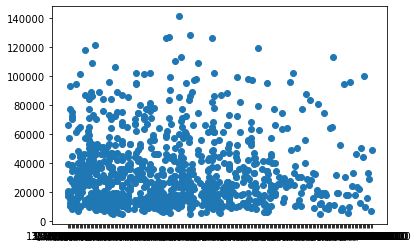

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

(array([151074., 119019.,  58000.,  32444.,  22876.,  13474.,   9330.,
          3884.,   2036.,    561.]),
 array([  4750.,  18475.,  32200.,  45925.,  59650.,  73375.,  87100.,
        100825., 114550., 128275., 142000.]),
 <a list of 10 Patch objects>)

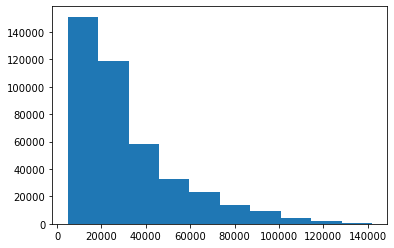

In [8]:
plt.hist(df['SalePrice'])

### Parsing Dates

In [93]:
df = pd.read_csv('data/TrainAndValid.csv',low_memory = False, parse_dates = ['saledate'])

In [94]:
df.saledate.dtype

dtype('<M8[ns]')

In [95]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
20   2006-05-18
21   2006-10-19
22   2007-10-25
23   2006-10-19
24   2004-05-20
25   2006-03-09
26   2006-03-09
27   2007-02-22
28   2007-08-09
29   2006-06-01
        ...    
70   2004-06-03
71   2004-03-11
72   2005-11-17
73   2009-07-16
74   2010-09-24
75   2007-10-18
76   2006-12-14
77   2007-10-25
78   2007-04-12
79   2009-03-26
80   2011-04-28
81   2006-12-07
82   2004-07-15
83   2009-07-23
84   2006-12-14
85   2007-11-15
86   2009-02-19
87   2009-03-12
88   2007-05-17
89   2005-08-11
90   2007-08-09
91   2008-10-03
92   2007-02-08
93   2009-07-09
94   2005-10-20
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 

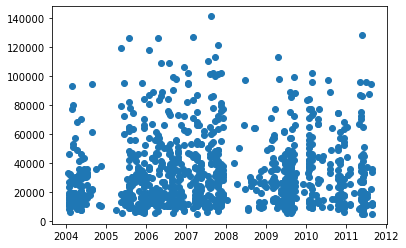

In [96]:
fig, ax  = plt.subplots()
ax.scatter(list(df['saledate'])[:1000], list(df['SalePrice'])[:1000]);

## Hot take - It isn't working without using list

In [97]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Sort DataFrame by Sale Date
Do it when using date and time

In [98]:
df.sort_values(by = ['saledate'], inplace = True, ascending = True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [99]:
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [100]:
df_tmp['saleyear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayofWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayofYear'] = df_tmp.saledate.dt.dayofyear

In [101]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [102]:
df_tmp.drop('saledate', axis = 1, inplace = True)

In [103]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Modelling
>Changing string into category using panda

In [104]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [105]:
#Find the columns which contains string
for label, content in  df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [106]:
#convert object into category
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]  = content.astype('category').cat.as_ordered()

In [107]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
SalesID                     412698 non-null int64
SalePrice                   412698 non-null float64
MachineID                   412698 non-null int64
ModelID                     412698 non-null int64
datasource                  412698 non-null int64
auctioneerID                392562 non-null float64
YearMade                    412698 non-null int64
MachineHoursCurrentMeter    147504 non-null float64
UsageBand                   73670 non-null category
fiModelDesc                 412698 non-null category
fiBaseModel                 412698 non-null category
fiSecondaryDesc             271971 non-null category
fiModelSeries               58667 non-null category
fiModelDescriptor           74816 non-null category
ProductSize                 196093 non-null category
fiProductClassDesc          412698 non-null category
state                       412698 non-null category
Prod

In [108]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [109]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
54653      8
81383      8
204924     8
135376     8
113390     8
113394     8
116419     8
32138      8
127610     8
76171      8
127000     8
128130     8
127626     8
55455      8
55454      8
144032     8
54438      9
144952     8
205752     8
28927      9
86971      8
67034      8
87602      8
53101      8
205784     8
          ..
407382     4
405913     4
405915     4
411423     4
412544     4
409901     4
405777     4
411889     4
409896     4
411890     4
406079     4
409783     4
411522     4
412218     4
411527     4
406092     4
409780     4
406167     4
411334     4
412164     4
409202     4
408976     4
411695     4
411319     4
408889     4
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [110]:
df_tmp.isnull().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## FIll Missing Value

### Fill Numeric Missing Value

In [111]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label) 
        


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [112]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [113]:
#Fill numeric rows with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells if data was mmissing or not
            df_tmp[label + 'is_missing'] = pd.isnull(content)
            #Fill missing values with median
            df_tmp[label] = content.fillna(content.median())

In [114]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,saleMonth,saleDay,saleDayofWeek,saleDayofYear,auctioneerIDis_missing,MachineHoursCurrentMeteris_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


### Filling and turning categorical variables in codes


In [115]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [116]:
#Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column, because we haven't checked for missing values it creates this for all columns
        df_tmp[label + 'ismissing'] = pd.isnull(content)
        #Turn categories into numbers and +1
        df_tmp[label] = pd.Categorical(content).codes +1 #Default assign -1 to null

In [117]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [118]:
pd.Categorical(df_tmp.UsageBand).codes 

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [119]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119


In [120]:
df_tmp.isna().sum()

SalesID                             0
SalePrice                           0
MachineID                           0
ModelID                             0
datasource                          0
auctioneerID                        0
YearMade                            0
MachineHoursCurrentMeter            0
UsageBand                           0
fiModelDesc                         0
fiBaseModel                         0
fiSecondaryDesc                     0
fiModelSeries                       0
fiModelDescriptor                   0
ProductSize                         0
fiProductClassDesc                  0
state                               0
ProductGroup                        0
ProductGroupDesc                    0
Drive_System                        0
Enclosure                           0
Forks                               0
Pad_Type                            0
Ride_Control                        0
Stick                               0
Transmission                        0
Turbocharged

In [121]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119


### Save Data till now

In [122]:
df_tmp.to_csv('data/train_tmp.csv', index = False)

In [123]:
df_tmp = pd.read_csv('data/train_tmp.csv', low_memory = False)


> Now all data is converted into numeric and missing value is filled

In [13]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42,
                             n_estimators = 100)

model.fit(df_tmp.drop('SalePrice', axis =1 ), df_tmp['SalePrice'])

Wall time: 5min 29s


In [15]:
model.score(df_tmp.drop('SalePrice',axis =1), df_tmp['SalePrice'])

0.9875468079970563

### Splitting data into train and validation sets

In [16]:
df_tmp.saleyear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleyear, dtype: int64

In [17]:
#Split data into training and validation
df_val = df_tmp[df_tmp.saleyear == 2012]
df_train = df_tmp[df_tmp.saleyear!=2012]

len(df_val), len(df_train)

(11573, 401125)

In [18]:
#Split data into x and y
x_train, y_train = df_train.drop('SalePrice', axis=1 ), df_train.SalePrice
x_valid, y_valid = df_val.drop('SalePrice', axis =1), df_val.SalePrice

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [33]:
#Create evaluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculate root mean log squared log error between predictions and true values.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#Create function to evaluate model on few different models
def show_score(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {'Training MAE' : mean_absolute_error(y_train, train_preds),
             'Valid MAE' : mean_absolute_error(y_valid, val_preds),
             'Training RMSLE' : rmsle(y_train, train_preds),
             'Valid RMSLE': rmsle(y_valid, val_preds),
             'Training R^2' : r2_score(y_train, train_preds),
             'Valid R^2' : r2_score(y_valid, val_preds)}
    
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [36]:
 model = RandomForestRegressor(n_jobs = -1, n_estimators=100, random_state = 42)

model.fit(x_train[:20000],  y_train[:20000])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
# Max_samples isn't defined, god knows why
#model = RandomForestRegressor(max_samples = 1000)

In [37]:
#If we fit  whole training set, then R^2 score will increase, or it can be increased by using max_samples also
show_score(model)

{'Training MAE': 20800.38310496728,
 'Valid MAE': 25188.747447507132,
 'Training RMSLE': 0.7691299935771351,
 'Valid RMSLE': 0.8342068157558842,
 'Training R^2': -0.5135425369255395,
 'Valid R^2': -0.5527899475963391}

### HyperParameter tuning with RandomizedSearchCV

In [43]:
%%time 

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {'n_estimators' : np.arange(10,100,10),
          'max_depth' : [None, 3, 5, 10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf':np.arange(1, 20, 2),
          'max_features' : [0.5, 1, 'sqrt', 'auto']}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                   random_state = 42),
                                                   param_distributions = rf_grid,
                                                   n_iter = 2,
                                                   cv =5,
                                                   verbose = True)
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.9min finished


Wall time: 4min 12s


In [44]:
rs_model.best_params_


{'n_estimators': 50,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 1,
 'max_depth': None}

In [45]:
show_score(rs_model)

{'Training MAE': 5027.729099101616,
 'Valid MAE': 8808.781090654868,
 'Training RMSLE': 0.23551297038712674,
 'Valid RMSLE': 0.359764939589747,
 'Training R^2': 0.8888498622436045,
 'Valid R^2': 0.7663070903876842}

### Training on best param
**Note** - These were found on 100 iter on subset of 10000 max_samples

In [46]:
ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs = -1,
                                   random_state = 42)

ideal_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
show_score(ideal_model)

{'Training MAE': 2953.072504497185,
 'Valid MAE': 5975.684592225561,
 'Training RMSLE': 0.14462409501251125,
 'Valid RMSLE': 0.24670321038158363,
 'Training R^2': 0.9589099764885849,
 'Valid R^2': 0.8807032869400788}

### Make predicitions on TEST data

In [49]:
df_test = pd.read_csv('data/Test.csv', low_memory = False, parse_dates = ['saledate'])

In [50]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Test dataset in same format as training dataset

In [55]:
def preprocess_data(df):
    
    df['saleyear'] = df['saledate'].dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayofWeek'] = df.saledate.dt.dayofweek
    df['saleDayofYear'] = df.saledate.dt.dayofyear

    df.drop('saledate', axis = 1, inplace = True)
    
    #Fill numeric missing data with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binary column which tells if data was mmissing or not
                df[label + 'is_missing'] = pd.isnull(content)
                #Fill missing values with median
                df[label] = content.fillna(content.median())
    
    #Fill categorical missing data and turn categories into numbers
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+ 'ismissing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    return df

In [ ]:
df_test = preprocess_data(df_test)

In [59]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthismissing,Stick_Lengthismissing,Thumbismissing,Pattern_Changerismissing,Grouser_Typeismissing,Backhoe_Mountingismissing,Blade_Typeismissing,Travel_Controlsismissing,Differential_Typeismissing,Steering_Controlsismissing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [60]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthismissing,Stick_Lengthismissing,Thumbismissing,Pattern_Changerismissing,Grouser_Typeismissing,Backhoe_Mountingismissing,Blade_Typeismissing,Travel_Controlsismissing,Differential_Typeismissing,Steering_Controlsismissing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [62]:
# x_train has 102 columns while  df_test has 101 columns coz test data is different from training data
# Find the differ columns using python's set
set(x_train.columns)-set(df_test.columns)

{'auctioneerIDis_missing'}

In [63]:
# Adding auctioneerIDis_missing column to df_test
df_test['auctioneerIDis_missing'] = False

In [64]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthismissing,Thumbismissing,Pattern_Changerismissing,Grouser_Typeismissing,Backhoe_Mountingismissing,Blade_Typeismissing,Travel_Controlsismissing,Differential_Typeismissing,Steering_Controlsismissing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Now test data frame has same features as training dataframe so we can make predictions

In [65]:
test_preds = ideal_model.predict(df_test)

In [67]:
#Format predicitions into same as kaggle is asking
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19366.461874
1,1227844,19708.869438
2,1227847,53428.838945
3,1227848,66631.864258
4,1227863,43284.440799
5,1227870,34943.011187
6,1227871,30678.491930
7,1227879,13683.698642
8,1227880,21329.829956
9,1227881,37768.642372


In [69]:
#Exporting predicted data
df_preds.to_csv('data/test_predictions.csv', index = False)

### Feature Importance

In [70]:
len(ideal_model.feature_importances_)

102

In [77]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                       'feature_importances': importances})
         .sort_values('feature_importances', ascending = False)
    .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

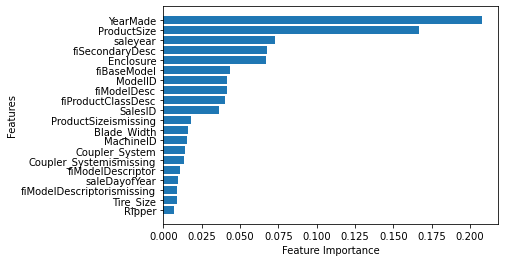

In [78]:
plot_features(x_train.columns, ideal_model.feature_importances_)